<a href="https://colab.research.google.com/github/Kayathri2000/python-data-analytica-/blob/main/project__movie_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the Kollywood data set(2011-2017)

Kollywood Industry is a Tamil cinema industry where the film’s success is dependent on the people’s reaction to the film.

# Mounting drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing needed libraries 

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

# Reading data

In [ ]:
movie=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kollywood Movie Dataset (2011 - 2017).csv')

# Basic inspection 

In [ ]:
movie.shape

(416, 8)

In [ ]:
movie.head()

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
0,2011,Venghai,Tamil,Hari,"Dhanush, Tamannaah Bhatia, Rajkiran",drama,Veera Pandi (Raj Kiran) is a powerful and rich...,4.7
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1
2,2011,Kanchana,Tamil,Raghava Lawrence,"Raghava Lawrence, R. Sarathkumar, Lakshmi Rai",comedy horror,Raghava (Lawrence Raghavendra) is a typical jo...,6.6
3,2011,Karungali,Tamil,Kalanjiyam,"Kalanjiyam, Anjali, Srinivas, Sunitha Varma, A...",drama,"Kanimozhi[2](Sunitha Verma), a doctor by profe...",5.5
4,2011,Veppam,Tamil,Anjana Ali Khan,"Karthik Kumar, Nani, Nithya Menen, Bindu Madhavi",drama,The film starts by showing a girl named Revath...,4.8


In [ ]:
movie.columns

Index(['Release Year', 'Title', 'Language', 'Director', 'Cast', 'Genre',
       'Plot', 'Rating'],
      dtype='object')

# Information about the variables

**Release Year**- The year in which a particular movie is released


**Title** -Name of the movie


**Language** -Refers to the language of the movie (here it is Tamil for all)


**Director** - Gives us the director of the movie


**Cast** - Refers to all the actors and actresses involved in the movie


**Genre** -Refers to the genre in which the movie is taken


**Plot** - Story of the movie


**Rating** - Average of people’s reactions to the movie


Here in case of the presence of a missing value, we can't replace it as every movie has its  unique details



# Problem statements 

This dataset consits of Release Year,Title,Language,Director,Cast,Genre,Plot,and Rating.


These are the essential variable to find the following 

*  Top 5 movie details 
*  most recursive Genre
*  Most rated movie 
*  Highest likable genre
*  Most attractive plot
*  Most recursive director
*  Movie of the year(each year) 

*  Analysis on individuals




Note- Everything is based on ratings 



In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release Year  416 non-null    int64  
 1   Title         416 non-null    object 
 2   Language      416 non-null    object 
 3   Director      416 non-null    object 
 4   Cast          416 non-null    object 
 5   Genre         416 non-null    object 
 6   Plot          416 non-null    object 
 7   Rating        409 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 26.1+ KB


In [ ]:
movie.describe(include='all')

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
count,416.000000,416,416,416,416,416,416,409.000000
unique,NaN,416,1,309,415,80,416,NaN
top,NaN,Venghai,Tamil,A. L. Vijay,"Vijay Sethupathi, Remya Nambeesan",drama,Veera Pandi (Raj Kiran) is a powerful and rich...,NaN
freq,NaN,1,416,7,2,50,1,NaN
mean,2014.418269,NaN,NaN,NaN,NaN,NaN,NaN,5.964548
std,1.816405,NaN,NaN,NaN,NaN,NaN,NaN,1.090035
min,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.100000
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.200000
50%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.600000


The size of the data coincides with the count at each column so there are no blank values and also data type for each column is correct Even though the data type is correct we can't conclude that it doesn’t contain garbage values

# Data cleaning 

In [ ]:
print(movie.isnull().sum()) 

Release Year    0
Title           0
Language        0
Director        0
Cast            0
Genre           0
Plot            0
Rating          7
dtype: int64


There are seven Nan values filling it with central tendencies may lead to wrong data input as ratings are based on people’s reactions to the movie so dropping it may be the best decision

In [ ]:
movie=movie.dropna()

In [ ]:
#check
print(movie.isnull().sum()) 

Release Year    0
Title           0
Language        0
Director        0
Cast            0
Genre           0
Plot            0
Rating          0
dtype: int64


In [ ]:
#Dealing columns names with space lead to restriction in calling the columns with dot operator so changing it with an underscore
movie=movie.rename(columns = {"Release Year":"Release_year"})


In [ ]:
#check
movie.head(2)

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
0,2011,Venghai,Tamil,Hari,"Dhanush, Tamannaah Bhatia, Rajkiran",drama,Veera Pandi (Raj Kiran) is a powerful and rich...,4.7
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1


Removing duplicates

In [ ]:
movie['Title'].value_counts()

Venghai                    1
Thoongaa Vanam             1
Kathakali                  1
Maalai Nerathu Mayakkam    1
Pasanga 2                  1
                          ..
Malini 22 Palayamkottai    1
Ner Ethir                  1
Goli Soda                  1
Veeram                     1
Velaikkaran                1
Name: Title, Length: 409, dtype: int64

In [ ]:
movie.Title.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
411    False
412    False
413    False
414    False
415    False
Name: Title, Length: 409, dtype: bool

There are no duplicates so no need to remove anything 

# Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0190aa7ed0>,
      dtype=object)

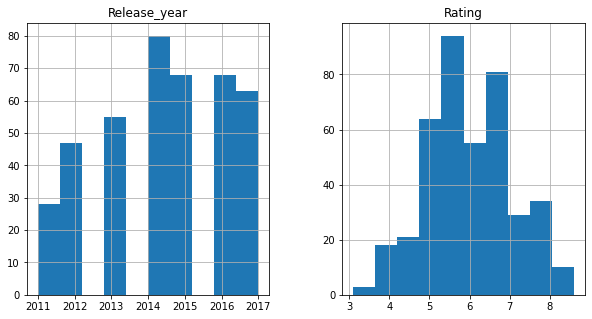

In [ ]:
movie.hist(figsize=(10,5))


The highest number of films are released in the year 2014 and the least released in 2011

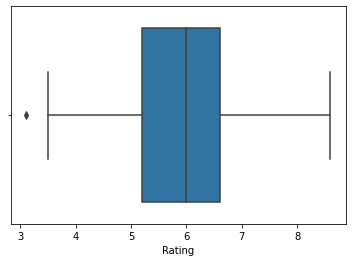

In [ ]:
sns.boxplot(x=movie['Rating'])


Most of the ratings are between 5 to 6 so we can conclude that people feel the movies released in this period (2011-2017) are quite average

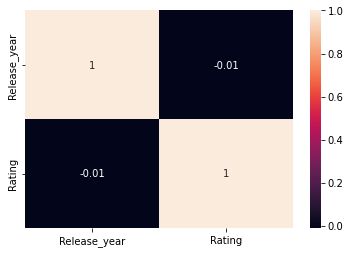

In [ ]:
sns.heatmap(movie.corr(), annot=True)
plt.show()

We can’t find any correlation between release year and ratings so they are independent variables 

# Number of movies released in each year 

In [ ]:
year=movie.Release_year.value_counts()

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

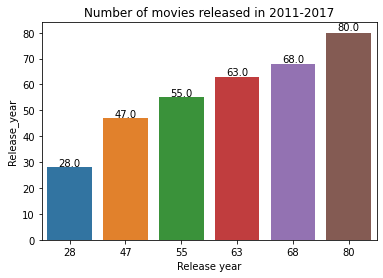

In [ ]:
x=year.index
y=year
p = sns.barplot(x,y, data=year, ci=None)
plt.xlabel('Release year')
plt.title('Number of movies released in 2011-2017')

show_values(p)

# Top 5 movie details [Based on ratings] 

In [ ]:
movie1=movie.sort_values(by='Rating')
movie1.tail()

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1
171,2014,Thirumanam Enum Nikkah,Tamil,Anees,"Jai, Nazriya Nazim, Hebah Patel",romance,Ragava (Jai) and Vishnu Priya (Nazriya Nazim) ...,8.1
371,2017,Baahubali: The Conclusion,Tamil,S. S. Rajamouli,"Prabhas, Anushka Shetty, Rana Daggubati, Sathy...",fantasy,Kattappa continues to narrate how he ended up ...,8.1
413,2017,Aruvi,Tamil,Arun Prabu Purushothaman,"Aditi Balan, Lakshmi Gopalswami, Shwetha Shekar",social drama,The film begins with Aruvi (Aditi Balan) and E...,8.5
389,2017,Vikram Vedha,Tamil,Pushkar-Gayathri,"R. Madhavan, Vijay Sethupathi, Varalaxmi Sarat...",crime thriller,The story begins with an animated interpretati...,8.6


# Most recursive genre

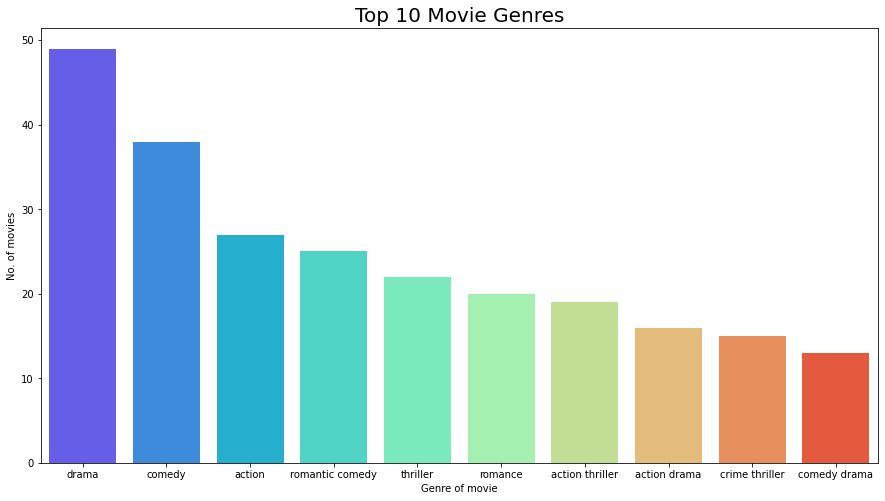

In [ ]:
top_genere = movie.groupby('Genre')['Title'].count().reset_index().sort_values("Title", ascending = False)[:10]
plt.figure(figsize = (15,8))
plt.title("Top 10 Movie Genres", fontdict= {"fontsize": 20})
sns.barplot(x="Genre", y= "Title",data= top_genere, palette="rainbow")
plt.xlabel("Genre of movie")
plt.ylabel("No. of movies")
plt.show()

The most recursive genre is **drama** 

In [ ]:
max_movie=movie[movie['Rating']>=7.5]

In [ ]:
max_movie.shape

(44, 8)

In [ ]:
#check
max_movie.head()

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1
10,2011,Mankatha,Tamil,Venkat Prabhu,"Ajith Kumar, Arjun, Trisha, Lakshmi Rai, Andre...","action, thriller","Vinayak Mahadev (Ajith Kumar), an assistant co...",7.6
15,2011,Vaagai Sooda Vaa,Tamil,A. Sargunam,"Vimal, Iniya, K. Bhagyaraj","period piece, romantic drama",The story is set in 1960s. Veluthambi (Vimal) ...,8.0
18,2011,Raa Raa,Tamil,Sandilya,"Udhaya, Shweta Basu Prasad",romantic comedy,The story revolves around Bharathi (Udaya) and...,8.1
32,2012,Sengathu Bhoomiyilae,Tamil,Rathna Kumar,"Pavan, Mirchi Senthil, Priyanka Nair, Sunu Lak...",drama,Sengathu Bhoomiyilae is the story of two close...,7.9


# Most rated movie 

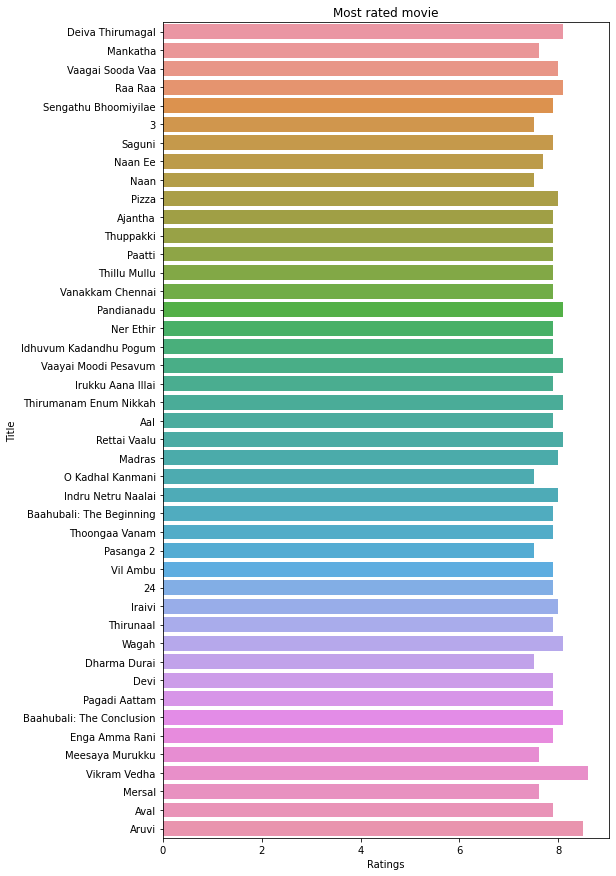

In [ ]:
plt.figure(figsize=(8,15))
p1=sns.barplot(y=max_movie['Title'],x=max_movie['Rating'],orient='h')
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Most rated movie')
plt.show()

The most rated movie is **Vikram Vedha**

![picture](https://drive.google.com/uc?id=15bvuMWekytFDz4LWo8fOqDycVX-NtXQ7)

# Highest likable Genre





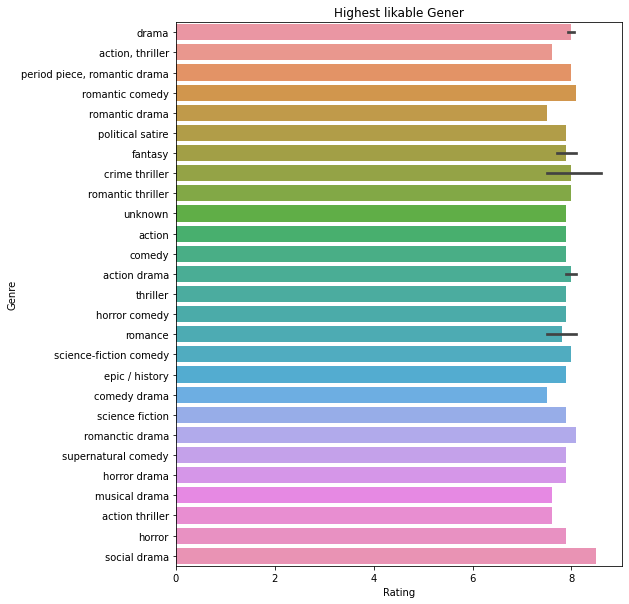

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(y=max_movie['Genre'],x=max_movie['Rating'],orient='h')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Highest likable Gener')
plt.show()

The highest likable Genre is  **social drama**

# Most attractive plot

In [ ]:
movie1.tail(1)

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
389,2017,Vikram Vedha,Tamil,Pushkar-Gayathri,"R. Madhavan, Vijay Sethupathi, Varalaxmi Sarat...",crime thriller,The story begins with an animated interpretati...,8.6


# Most recursive director


In [ ]:
di=pd.DataFrame(movie.Director.value_counts())
di.head()

,Director
A. L. Vijay,7
Suseenthiran,6
Pandiraj,5
Sundar C.,5
Ezhil,5


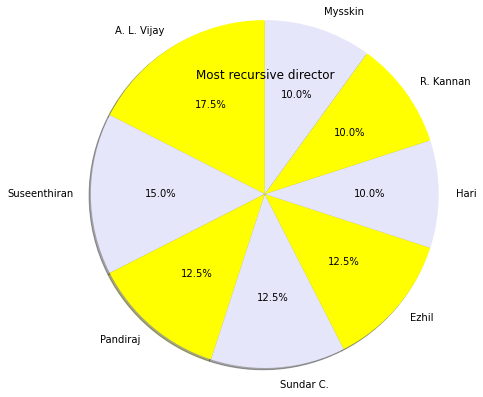

In [ ]:

director = di.head(8)
labels = (np.array(director.index))
sizes = (np.array((director/director.sum())*100))
colors = ['yellow','lavender']
plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90,radius=2)
plt.title("Most recursive director")
plt.show()


The most recursive director is **A.L. Vijay**

![picture](https://drive.google.com/uc?id=1rgLFVlsP9HFxoHe0cjjcoJMMbOahbLUM)


#Analysis on director vijay's work

In [ ]:
alvijay=movie1[movie1['Director']=='A. L. Vijay']
alvijay.tail()

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
61,2012,Thaandavam,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amy Jackson, Lakshmi Rai",action,"On 1 January 2011, a sudden bomb blast occurs ...",5.6
108,2013,Thalaivaa,Tamil,A. L. Vijay,"Vijay, Sathyaraj, Amala Paul, Santhanam, Abhim...",action thriller,Vishwa (Vijay) is a dancer who lives in Sydney...,6.1
257,2015,Idhu Enna Maayam,Tamil,A. L. Vijay,"Vikram Prabhu, Navdeep, Keerthy Suresh, Kavya ...",romantic comedy,Arun (Vikram Prabhu) is a struggling theatre a...,6.6
338,2016,Devi,Tamil,A. L. Vijay,"Prabhu Deva, Tamannaah, Sonu Sood",supernatural comedy,Krishna Kumar (Prabhu Deva) is a happy go luck...,7.9
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1


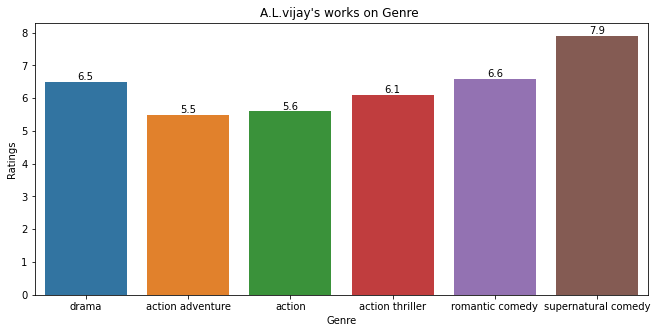

In [ ]:
plt.figure(figsize=(11,5))
pa = sns.barplot(alvijay.Genre,alvijay.Rating, data=alvijay, ci=None)
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.title("A.L.vijay's works on Genre ")

show_values(pa)

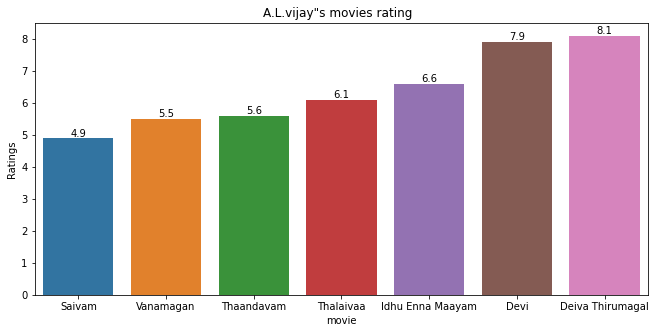

In [ ]:
plt.figure(figsize=(11,5))
pr = sns.barplot(alvijay.Title,alvijay.Rating, data=alvijay, ci=None)
plt.xlabel('movie')
plt.ylabel('Ratings')
plt.title('A.L.vijay"s movies rating  ')

show_values(pr)

His work on super natural comedy got more ratings and his best film is Deiva Thirumagal

#Analysis on actor Sivakarthikeyan's work

In [ ]:
Sivakarthikeyan_movie=[]
for i in movie.Cast:
    if "Sivakarthikeyan" in i:
        Sivakarthikeyan_movie.extend(list(movie[movie.Cast == i]["Title"].values))

Sivakarthikeyan_movie
Sivakarthikeyan=movie[movie['Title'].isin(Sivakarthikeyan_movie)]
Sivakarthikeyan=Sivakarthikeyan.sort_values(by='Rating')
Sivakarthikeyan


,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
340,2016,Remo,Tamil,Bakkiyaraj Kannan,"Sivakarthikeyan, Keerthy Suresh, Sathish",romantic comedy,Siva aka S.K (Sivakarthikeyan) is a theatre ac...,4.7
89,2013,Kedi Billa Killadi Ranga,Tamil,Pandiraj,"Vimal, Sivakarthikeyan, Bindu Madhavi, Regina ...",comedy,"The film opens with two friends ""Pattai"" Murug...",4.8
45,2012,Manam Kothi Paravai,Tamil,Ezhil,"Sivakarthikeyan, Aathmiya",romantic comedy,Kannan (Sivakarthikeyan) is a carefree youth w...,5.4
220,2015,Kaaki Sattai,Tamil,"R. S. Durai Senthilkumar,","Sivakarthikeyan, Sri Divya, Prabhu",comedy masala,Mathimaran (Sivakarthikeyan) is a police const...,5.6
111,2013,Varuthapadatha Valibar Sangam,Tamil,Ponnraam,"Sivakarthikeyan, Sri Divya, Sathyaraj, Soori",comedy,The film begins with police arriving at Sivana...,6.4
281,2016,Rajini Murugan,Tamil,Ponram,"Sivakarthikeyan, Keerthy Suresh, Soori, Samuth...",comedy,Rajini Murugan (Sivakarthikeyan) is an unemplo...,6.4
415,2017,Velaikkaran,Tamil,Mohan Raja,"Sivakarthikeyan, Nayanthara, Fahadh Faasil, Sneha",thriller,Arivu (Sivakarthikeyan) hails from Kolaikkara ...,6.4
95,2013,Ethir Neechal,Tamil,Durai Senthil Kumar,"Sivakarthikeyan, Priya Anand",comedy-drama,"In 1987, a woman has complications while givin...",6.7
148,2014,Maan Karate,Tamil,Thirukumaran,"Sivakarthikeyan, Hansika Motwani, Vamsi Krishna",fantasy,"Five IT employees, Sandy (Sathish), Joe (Rajes...",7.3


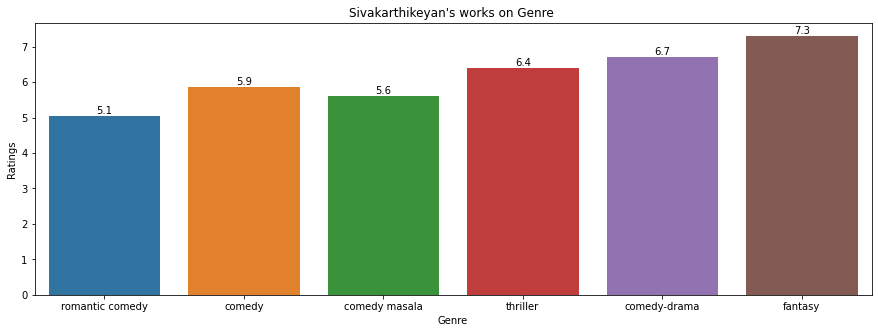

In [ ]:
plt.figure(figsize=(15,5))
va = sns.barplot(Sivakarthikeyan.Genre,Sivakarthikeyan.Rating, data=Sivakarthikeyan, ci=None)
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.title("Sivakarthikeyan's works on Genre ")

show_values(va)

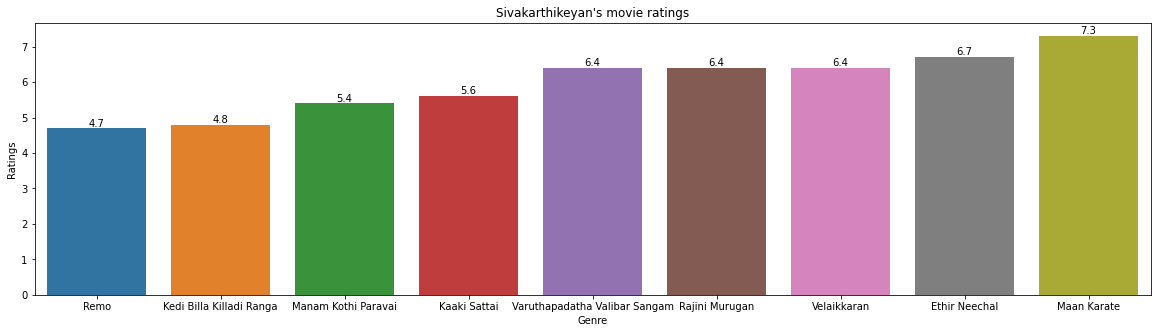

In [ ]:
plt.figure(figsize=(20,5))
vm = sns.barplot(Sivakarthikeyan.Title,Sivakarthikeyan.Rating, data=Sivakarthikeyan, ci=None)
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.title("Sivakarthikeyan's movie ratings")
show_values(vm)


His work on fantasy got more ratings and his best film is maan karate




# Movie of the year(each )[based on rating]


In [ ]:
year11=movie[movie['Release_year']==2011]
year11=year11.sort_values(by='Rating')
year11.tail(1)

,Release_year,Title,Language,Director,Cast,Genre,Plot,Rating
1,2011,Deiva Thirumagal,Tamil,A. L. Vijay,"Vikram, Anushka Shetty, Amala Paul, Baby Sara",drama,Krishna (Vikram) is intellectually disabled an...,8.1


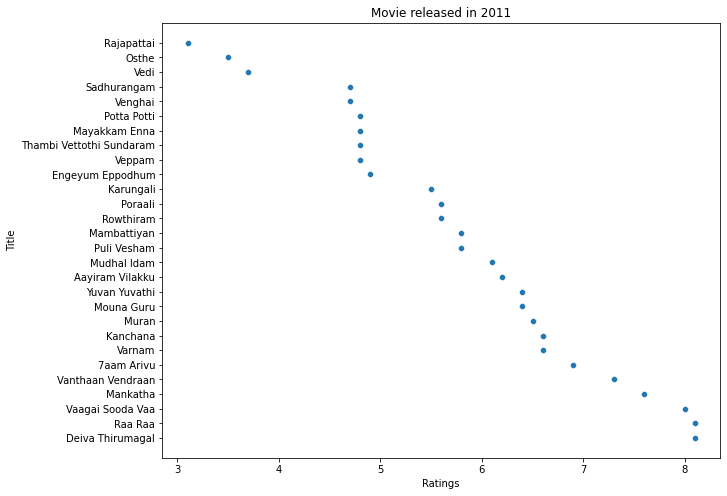

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(y=year11['Title'],x=year11['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2011')
plt.show()

Movie of the year(2011) 


>       Deiva Thirumagal


![picture](https://drive.google.com/uc?id=1vnB7eSbRp6k-1qyqfSoXRkBPEhFJmXlr)




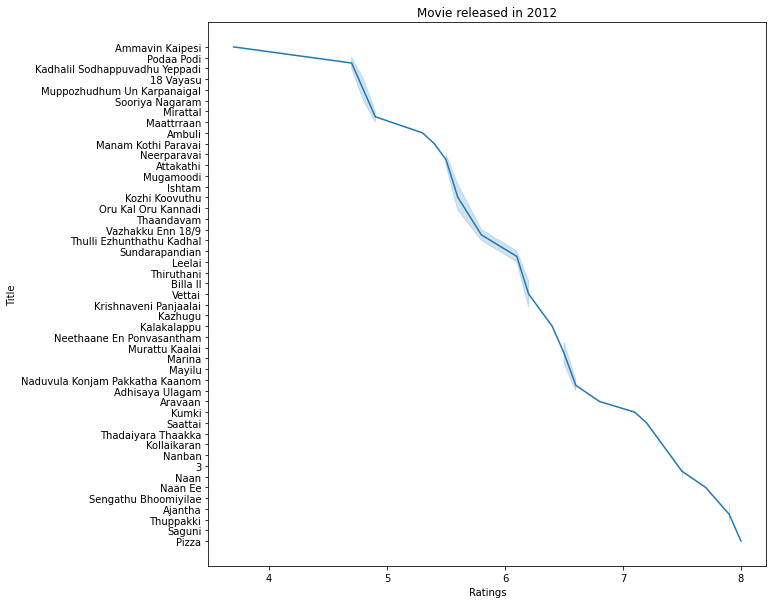

In [ ]:
year12=movie[movie['Release_year']==2012]
year12=year12.sort_values(by='Rating')
plt.figure(figsize=(10,10))
sns.lineplot(y=year12['Title'],x=year12['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2012')
plt.show()

Movie of the year(2012)


>        Pizza


![picture](https://drive.google.com/uc?id=1XaYo9T9cmCfEuuH-JTULQebVVx3NCqp3)


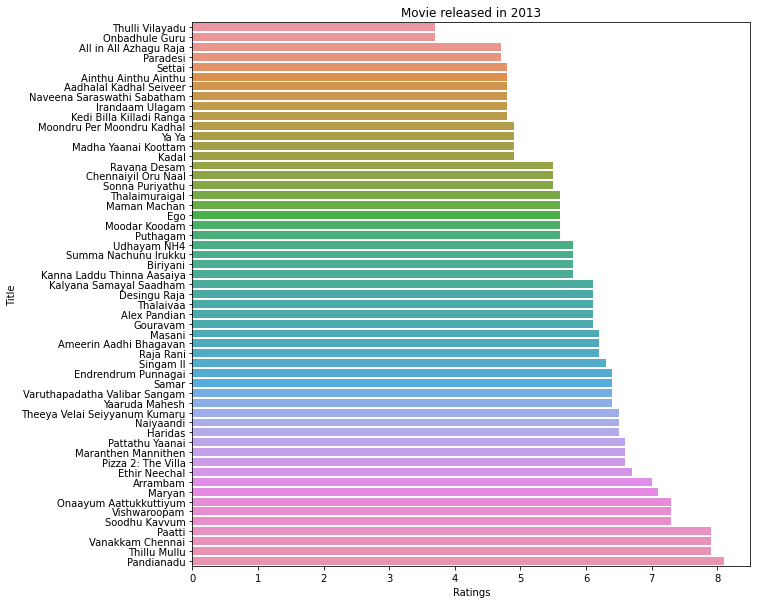

In [ ]:
year13=movie[movie['Release_year']==2013]
year13=year13.sort_values(by='Rating')
plt.figure(figsize=(10,10))
sns.barplot(y=year13['Title'],x=year13['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2013')
plt.show()

Movie of the year(2013)


>           Pandianadu


![picture](https://drive.google.com/uc?id=1a9ZjlyddJczisG29sNp6Z9R3FbWDpond)


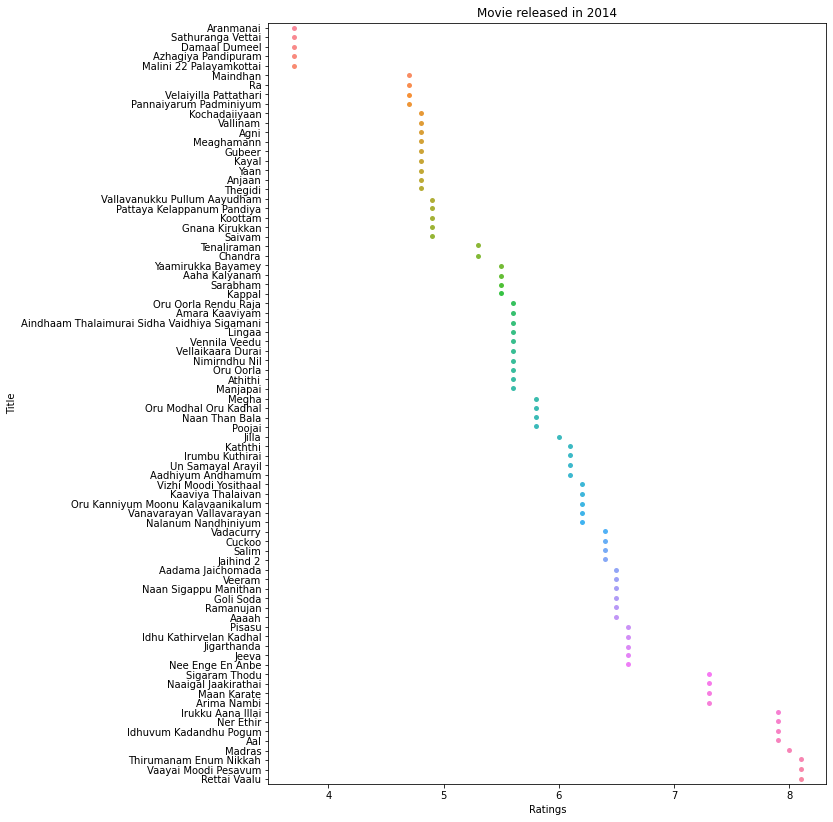

In [ ]:
year14=movie[movie['Release_year']==2014]
year14=year14.sort_values(by='Rating')
plt.figure(figsize=(10,14))
sns.stripplot(y=year14['Title'],x=year14['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2014')
plt.show()

Movie of the year(2014)



>       Rettai Vaalu


![picture](https://drive.google.com/uc?id=1arED-HMjEiULO_rtsmOpoJfmbTngO8_L)




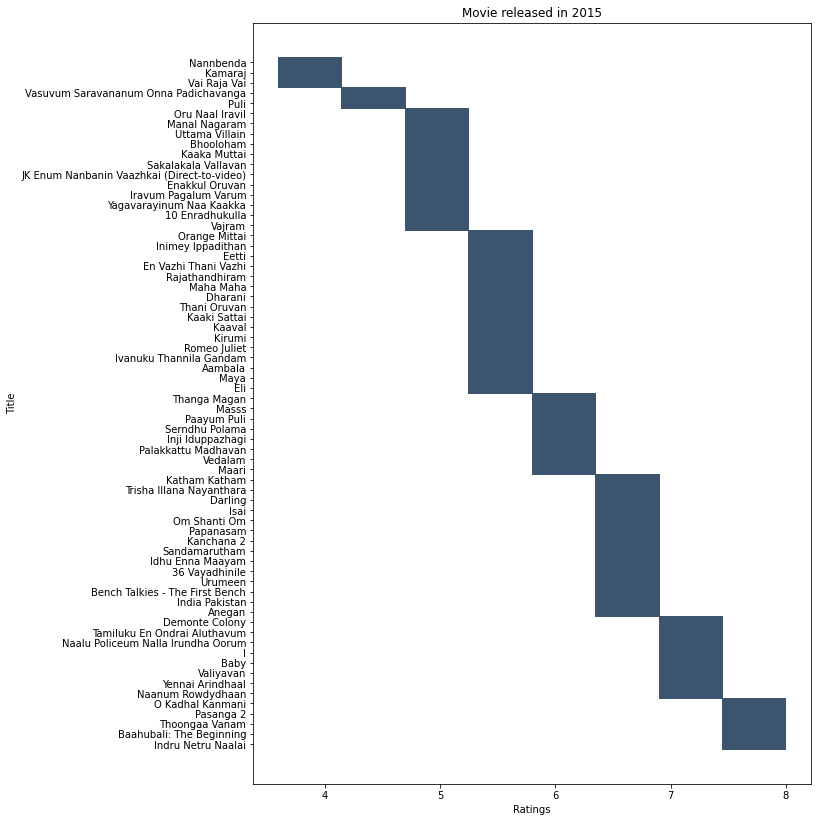

In [ ]:
year15=movie[movie['Release_year']==2015]
year15=year15.sort_values(by='Rating')
plt.figure(figsize=(10,14))
sns.histplot(y=year15['Title'],x=year15['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2015')
plt.show()

Movie of the year(2015)


>      Indru Netru Naalai	

![picture](https://drive.google.com/uc?id=1qb9F63c95vviJaM4hIeBTWx1I7PQyjoI)



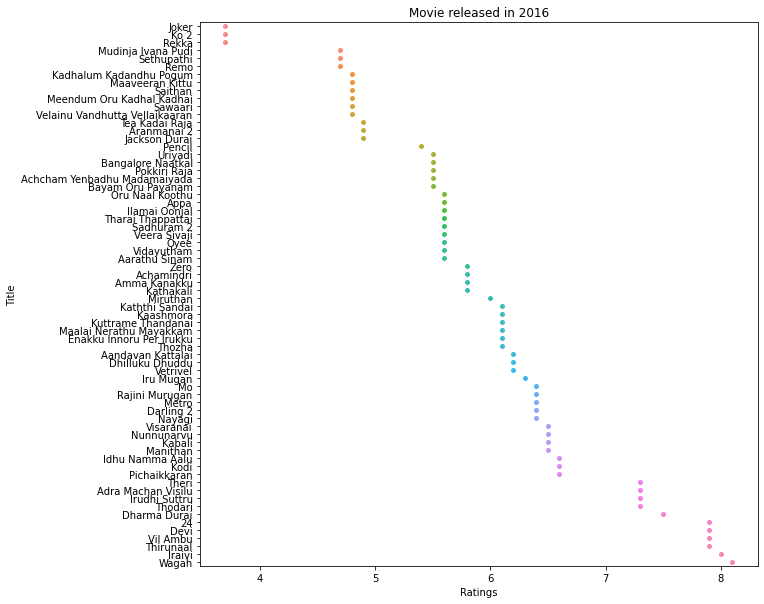

In [ ]:
year16=movie[movie['Release_year']==2016]
year16=year16.sort_values(by='Rating')
plt.figure(figsize=(10,10))
sns.swarmplot(y=year16['Title'],x=year16['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2016')
plt.show()

Movie of the year(2016)


>      Wagah

![picture](https://drive.google.com/uc?id=1vdURsr1G14oR_50_1kqNgtvwhuEoC_V8)



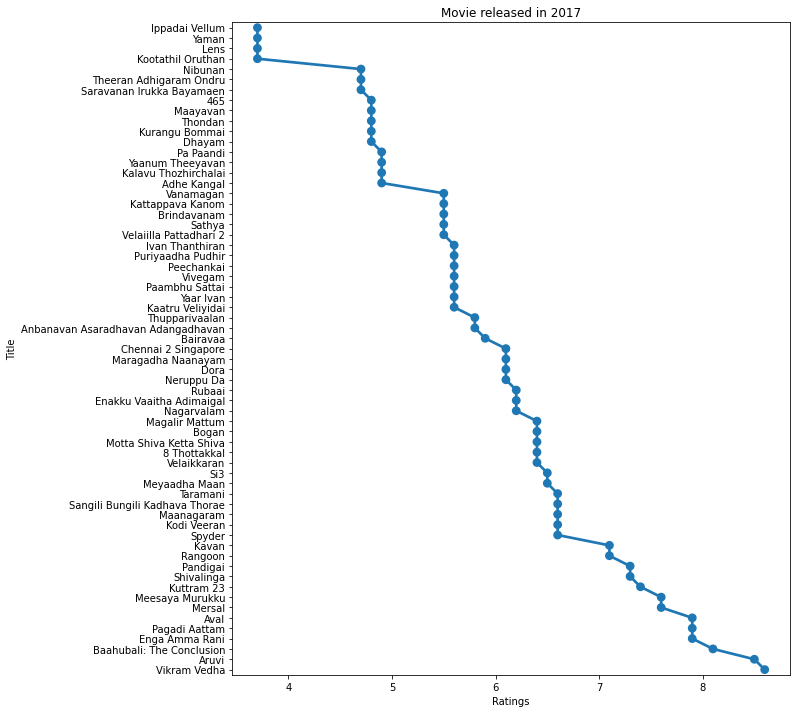

In [ ]:
year17=movie[movie['Release_year']==2017]
year17=year17.sort_values(by='Rating')
plt.figure(figsize=(10,12))
sns.pointplot(y=year17['Title'],x=year17['Rating'])
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title('Movie released in 2017')
plt.show()

Movie of the year(2017)




>     Vikram Vedha	


![picture](https://drive.google.com/uc?id=15bvuMWekytFDz4LWo8fOqDycVX-NtXQ7)





# conclusion 




The highest number of films are released in the year 2014 and the least released in 2011
________________________________________
Most of the ratings are between 5 to 6 so we can conclude that people feel the movies released in this period (2011-2017) are quite average

________________________________________

We can’t find any correlation between release year and ratings so they are independent variables 
________________________________________
The most recursive genre is drama
________________________________________

The most rated movie is Vikram Vedha

________________________________________
The highest likable Genre is a social drama

________________________________________
The most recursive director is A.L. Vijay


His work on super natural comedy got more ratings and his best film is Deiva Thirumagal
________________________________________

Sivakarthikeyan's work on fantasy got more ratings and his best film is maan karate


________________________________________
Movie of the year (2011)
  Deiva Thirumagal
________________________________________
Movie of the year (2012)
   Pizza
________________________________________
Movie of the year (2013)
      Pandianadu
________________________________________
Movie of the year (2014)
  Rettai Vaalu
________________________________________
Movie of the year(2015)
 Indru Netru Naalai    
________________________________________
Movie of the year(2016)
 Wagah
________________________________________
Movie of the year(2017)
Vikram Vedha    


-------------------------------------------------------------------------------------------------End of the project -----------------------------------------------------------------------------------------------